
RANDOM SAMPLING n = 150 AND DESCRIPTIVE STATISTICS



In [3]:
import pandas as pd

df = pd.read_csv('gym_members_exercise_tracking (2).csv')

In [4]:

# Import library
import pandas as pd

# Load dataset
df = pd.read_csv('gym_members_exercise_tracking (2).csv')

def descriptive_stats(sample, field):
    stats = {
        'Count': sample[field].count(),
        'Mean': sample[field].mean(),
        'Standard Deviation': sample[field].std(),
        'Minimum': sample[field].min(),
        '25th Percentile': sample[field].quantile(0.25),
        'Median': sample[field].median(),
        '75th Percentile': sample[field].quantile(0.75),
        'Maximum': sample[field].max()
    }
    return pd.Series(stats)

# Take random sample of 150 rows
random_sample = df.sample(n=150, random_state=42)

# Apply descriptive stats on Calories_Burned
random_stats = descriptive_stats(random_sample, 'Calories_Burned')

# Print results
print("Random Sample Descriptive Statistics for Calories_Burned:\n", random_stats)


Random Sample Descriptive Statistics for Calories_Burned:
 Count                  150.000000
Mean                   911.326667
Standard Deviation     296.842907
Minimum                333.000000
25th Percentile        709.250000
Median                 914.000000
75th Percentile       1135.750000
Maximum               1766.000000
dtype: float64


SYSTEMATIC SAMPLING AND DESCRIPTIVE STATISTICS

In [5]:

filtered_df = df[df['Session_Duration (hours)'] < 2]

# Select every k-th record to get 150 samples
step = max(len(filtered_df) // 150, 1)
systematic_sample = filtered_df.iloc[::step].head(150)

# Apply descriptive stats on Calories_Burned
systematic_stats = descriptive_stats(systematic_sample, 'Calories_Burned')

# Print results
print("Systematic Sample Descriptive Statistics for Calories_Burned:\n", systematic_stats)


Systematic Sample Descriptive Statistics for Calories_Burned:
 Count                  150.000000
Mean                   888.786667
Standard Deviation     243.737002
Minimum                382.000000
25th Percentile        744.750000
Median                 878.500000
75th Percentile       1023.750000
Maximum               1688.000000
dtype: float64


DESCRIPTIVE STATS REPORT
VISUALIZATION SETUP

In [6]:


# Get descriptive stats for the full dataset
calories_stats = descriptive_stats(df, 'Calories_Burned')

print("Descriptive Statistics for Calories_Burned (Full Dataset):\n")
print(calories_stats)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic style for charts
plt.style.use('seaborn-v0_8-muted')
sns.set_palette('muted')
sns.set_context('notebook')


Descriptive Statistics for Calories_Burned (Full Dataset):

Count                  973.000000
Mean                   905.422405
Standard Deviation     272.641516
Minimum                303.000000
25th Percentile        720.000000
Median                 893.000000
75th Percentile       1076.000000
Maximum               1783.000000
dtype: float64


SCATTER PLOT


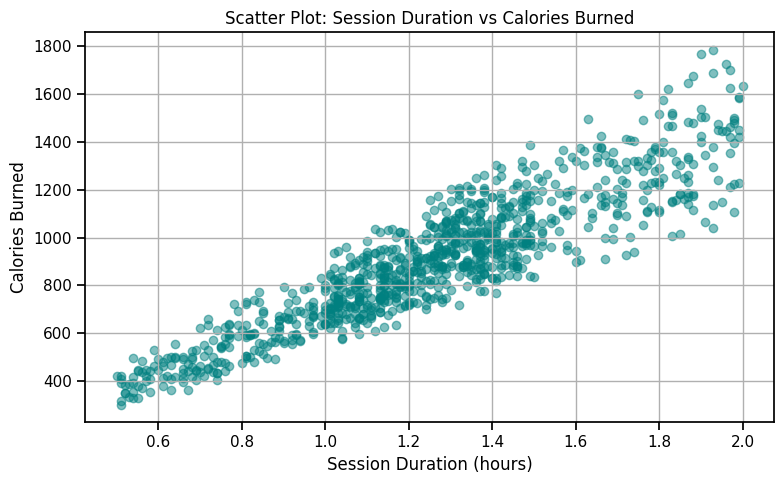

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], alpha=0.5, color='teal')
plt.title("Scatter Plot: Session Duration vs Calories Burned")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()

BOX PLOT

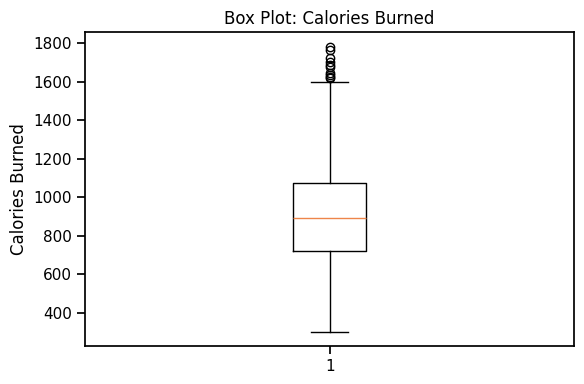

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Calories_Burned'].dropna())
plt.title("Box Plot: Calories Burned")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()


HISTOGRAM



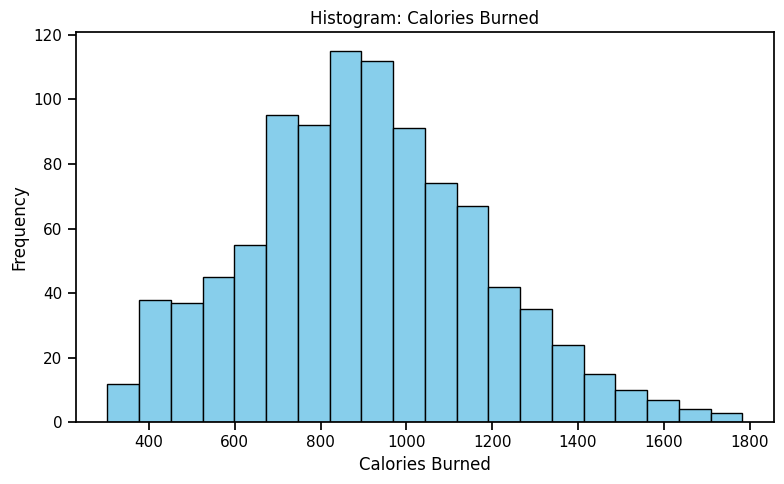

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['Calories_Burned'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram: Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

HEAT MAP

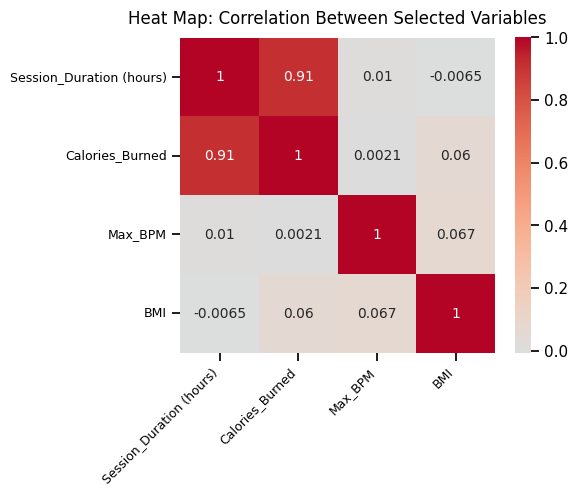

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Session_Duration (hours)', 'Calories_Burned', 'Max_BPM', 'BMI']

# Correlation matrix
corr = df[cols].corr()

# Plot clearer heatmap
plt.figure(figsize=(6, 5))  # Bigger figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, annot_kws={"size": 10})
plt.title("Heat Map: Correlation Between Selected Variables", fontsize=12, pad=10)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


Outlier Filtering

In [11]:
import pandas as pd
df = pd.read_csv("gym_members_exercise_tracking (2).csv").dropna()

q1 = df['Calories_Burned'].quantile(0.25)
q3 = df['Calories_Burned'].quantile(0.75)
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
df_clean = df[(df['Calories_Burned'] >= low) & (df['Calories_Burned'] <= high)].copy()


Hypothesis Testing

In [12]:

# Pearson and Spearman Correlation

import pandas as pd
from scipy.stats import pearsonr, spearmanr

df_clean = df[['Session_Duration (hours)', 'Calories_Burned']].dropna()

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df_clean['Session_Duration (hours)'], df_clean['Calories_Burned'])

# Spearman correlation
spearman_corr, spearman_p = spearmanr(df_clean['Session_Duration (hours)'], df_clean['Calories_Burned'])

# Print results
print("Pearson Correlation between Session Duration and Calories Burned:")
print(f"Correlation Coefficient: {pearson_corr:.4f}, P-value: {pearson_p:.4e}")

print("\nSpearman Correlation between Session Duration and Calories Burned:")
print(f"Correlation Coefficient: {spearman_corr:.4f}, P-value: {spearman_p:.4e}")


Pearson Correlation between Session Duration and Calories Burned:
Correlation Coefficient: 0.9081, P-value: 0.0000e+00

Spearman Correlation between Session Duration and Calories Burned:
Correlation Coefficient: 0.9035, P-value: 0.0000e+00


Chi-Square Test

In [13]:

# Chi-Square Test

import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create a categorical version of Calories_Burned
df['Calories_Group'] = pd.qcut(df['Calories_Burned'], q=2, labels=["Low", "High"])

# Step 2: Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Calories_Group'])

# Step 3: Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Display results
print("Chi-Square Test between Gender and Calories_Burned Group:")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4e}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test between Gender and Calories_Burned Group:
Chi2 Statistic: 12.2531
P-Value: 4.6450e-04
Degrees of Freedom: 1


One-Sample t-Test - HYPOTHESIS TESTING

In [14]:
import numpy as np
from scipy import stats

In [15]:

from scipy import stats
import pandas as pd

# Get dataset mean from the full dataset
dataset_mean = df['Calories_Burned'].mean()

# Take a random sample of 150 records
sample_size = 150
sample_data = df['Calories_Burned'].sample(n=sample_size, random_state=42)

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample_data, dataset_mean)

# Print results
print("One-Sample t-Test for Calories_Burned:")
print(f"Dataset Mean: {dataset_mean:.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")


One-Sample t-Test for Calories_Burned:
Dataset Mean: 905.42
T-Statistic: 0.2436
P-Value: 8.0787e-01


SIMPLE LINEAR REGRESSION

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking (2).csv")

# Select numeric columns and remove missing values
df = df[['Calories_Burned', 'Session_Duration (hours)']].dropna()

# Define variables
X = df[['Session_Duration (hours)']]  # Independent variable
y = df['Calories_Burned']             # Dependent variable


In [17]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Simple Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")


Simple Linear Regression Results:
Mean Squared Error: 15287.36
R-squared: 0.8168


Linear Regression Results:
Model Coefficient (Slope): 724.42
Model Intercept: -5.81
Mean Squared Error (MSE): 15287.36
R² Score: 0.8168


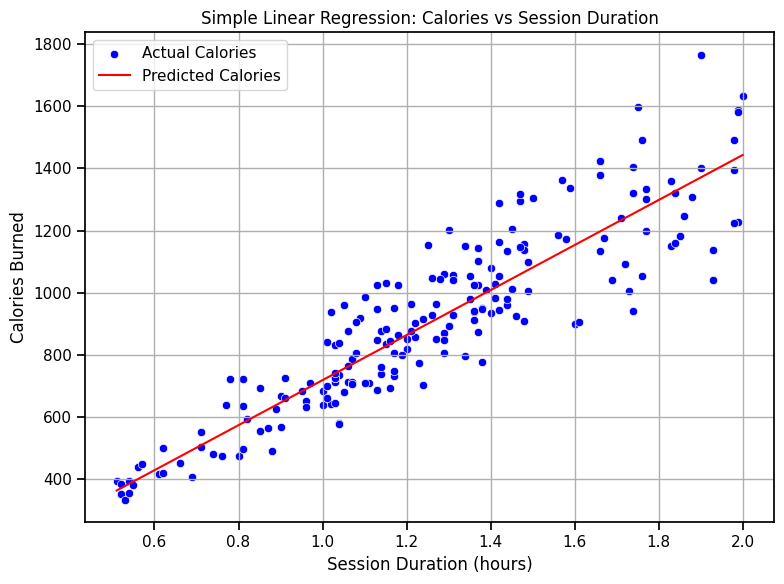

In [18]:


# Print the results
print("Linear Regression Results:")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Session_Duration (hours)'], y=y_test, label='Actual Calories', color='blue')
sns.lineplot(x=X_test['Session_Duration (hours)'], y=y_pred, color='red', label='Predicted Calories')
plt.title('Simple Linear Regression: Calories vs Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


MULTIPLE LINEAR REGRESSION

Multiple Linear Regression Results:
Mean Squared Error: 1,646.18
R² Score: 0.9803


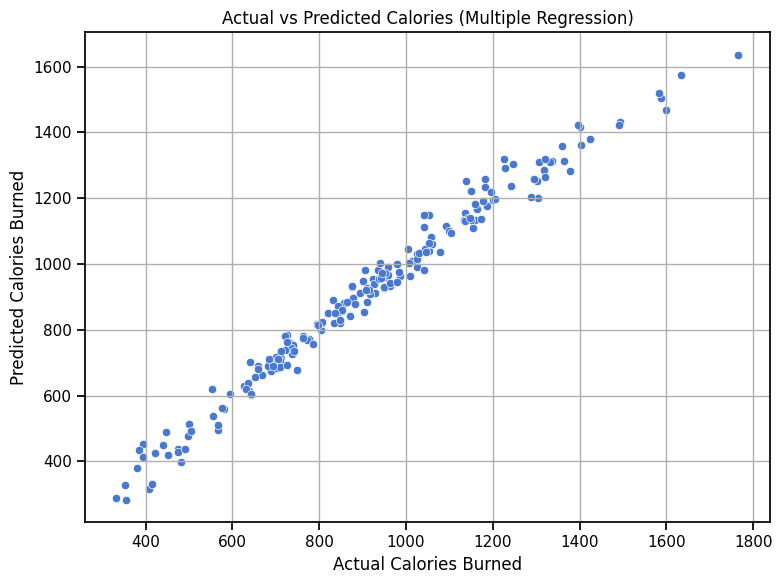

In [19]:
# Predict Calories_Burned from all relevant features

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking (2).csv").dropna()

# Target (y) and features (X)
y = df['Calories_Burned']
X = df.drop(['Calories_Burned'], axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Results:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories (Multiple Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


CLASSIFICATION

In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("gym_members_exercise_tracking (2).csv").dropna()

# Create binary class for Calories_Burned
df['Calories_Class'] = pd.cut(
    df['Calories_Burned'],
    bins=[-1, df['Calories_Burned'].median(), df['Calories_Burned'].max()],
    labels=['Low', 'High']
)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Calories_Class'])

X = df.drop(['Calories_Burned', 'Calories_Class'], axis=1)

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data prepared for classification successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Data prepared for classification successfully!
Training set shape: (778, 16)
Testing set shape: (195, 16)


CLASSIFICATION


Logistic Regression
Accuracy: 0.9590
Confusion Matrix:
[[97  5]
 [ 3 90]]

K-Nearest Neighbors
Accuracy: 0.7795
Confusion Matrix:
[[78 24]
 [19 74]]

Naive Bayes
Accuracy: 0.8154
Confusion Matrix:
[[72 30]
 [ 6 87]]

Decision Tree
Accuracy: 0.9077
Confusion Matrix:
[[90 12]
 [ 6 87]]


Best Classifier: Logistic Regression with Accuracy = 0.9590
Confusion Matrix of Best:
[[97  5]
 [ 3 90]]


Detailed Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.95      0.96       102
        High       0.95      0.97      0.96        93

    accuracy                           0.96       195
   macro avg       0.96      0.96      0.96       195
weighted avg       0.96      0.96      0.96       195


Optimization Result (KNN):
Best K value: 11
Best Cross-Validation Accuracy: 0.8109429280397024


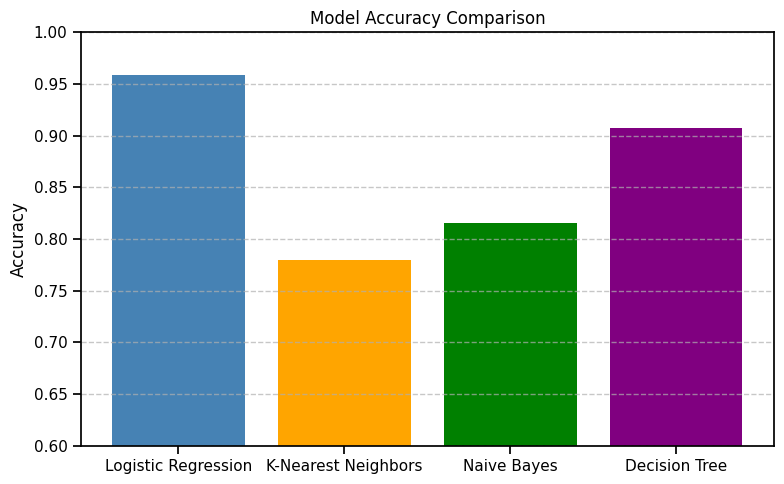

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

#  Load Dataset
df = pd.read_csv("gym_members_exercise_tracking (2).csv").dropna()

#  Convert Target Column into Classes
df['Calories_Class'] = pd.cut(
    df['Calories_Burned'],
    bins=[-1, df['Calories_Burned'].median(), df['Calories_Burned'].max()],
    labels=['Low', 'High']
)

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Calories_Class'])

# Select Features (Independent variables)
X = df.drop(['Calories_Burned', 'Calories_Class'], axis=1)
X = pd.get_dummies(X, drop_first=True)

#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale Data
scaler = StandardScaler(with_mean=False)
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#  Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

#  Train and Evaluate
results = {}

for name, clf in models.items():
    clf.fit(X_train_s, y_train)
    y_pred = clf.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = (acc, cm, clf)

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

#  Identify Best Model
best_name = max(results, key=lambda k: results[k][0])
best_acc, best_cm, best_clf = results[best_name]

print("\n===============================================\n")
print(f"Best Classifier: {best_name} with Accuracy = {best_acc:.4f}")
print("Confusion Matrix of Best:")
print(best_cm)
print("\n===============================================\n")

#  Detailed Classification Report
y_best_pred = best_clf.predict(X_test_s)
print("Detailed Classification Report:")
print(classification_report(y_test, y_best_pred, target_names=['Low', 'High']))

#  Optimization (GridSearch for KNN)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_s, y_train)

print("\nOptimization Result (KNN):")
print("Best K value:", grid.best_params_['n_neighbors'])
print("Best Cross-Validation Accuracy:", grid.best_score_)

#  Visualization: Accuracy Comparison
model_names = list(results.keys())
accuracies = [results[m][0] for m in model_names]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['steelblue', 'orange', 'green', 'purple'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Decision Tree and New Sample


In [22]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load and clean
df = pd.read_csv("gym_members_exercise_tracking (2).csv").dropna()

# 1) Show ranges for Low/High (Calories_Burned)
cal_median = df['Calories_Burned'].median()
cal_max    = df['Calories_Burned'].max()

print("Calories_Burned category ranges:")
print(f"Low  : Calories_Burned <= {cal_median}")
print(f"High : {cal_median} < Calories_Burned <= {cal_max}")

# 2) Create binary class by median
df['Calories_Class'] = pd.cut(
    df['Calories_Burned'],
    bins=[-1, cal_median, cal_max],
    labels=['Low', 'High']
)

# 3) Encode target
label_encoder = LabelEncoder()
df['Calories_Class_Encoded'] = label_encoder.fit_transform(df['Calories_Class'])
y = df['Calories_Class_Encoded']

X = df.drop(columns=['Calories_Burned', 'Calories_Class', 'Calories_Class_Encoded'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 7) New member row to predict (edit values as needed)
new_member = pd.DataFrame([{
    'Age': 24,
    'Gender': 'Female',
    'Weight (kg)': 62,
    'Height (m)': 1.65,
    'Max_BPM': 180,
    'Avg_BPM': 145,
    'Resting_BPM': 70,
    'Session_Duration (hours)': 1.2,
    'Workout_Type': 'Cardio',
    'Fat_Percentage': 24.0,
    'Water_Intake (liters)': 2.0,
    'Workout_Frequency (days/week)': 4,
    'Experience_Level': 'Intermediate',
    'BMI': 22.8
}])

# 8) Encode new row and align columns
new_member_encoded = pd.get_dummies(new_member, drop_first=True)
new_member_encoded = new_member_encoded.reindex(columns=X.columns, fill_value=0)

# 9) Predict class (Low/High)
pred_encoded = model.predict(new_member_encoded)[0]
pred_label = label_encoder.inverse_transform([pred_encoded])[0]

print("\nPredicted Calories Class for new member:", pred_label)


Calories_Burned category ranges:
Low  : Calories_Burned <= 893.0
High : 893.0 < Calories_Burned <= 1783.0

Predicted Calories Class for new member: Low


CLUSTERING AND CLASS PREDICTION

In [23]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking (2).csv").dropna()

# ---- CLASSIFICATION PART ----

# Create binary class for Calories_Burned
df['Calories_Class'] = pd.cut(
    df['Calories_Burned'],
    bins=[-1, df['Calories_Burned'].median(), df['Calories_Burned'].max()],
    labels=['Low', 'High']
)

# Encode labels
label_encoder = LabelEncoder()
df['Calories_Class_Encoded'] = label_encoder.fit_transform(df['Calories_Class'])

# Prepare features and target
X = df.drop(columns=['Calories_Burned', 'Calories_Class', 'Calories_Class_Encoded'])
X = pd.get_dummies(X, drop_first=True)
y = df['Calories_Class_Encoded']

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# New sample to predict
new_member = pd.DataFrame([{
    'Age': 25,
    'Gender': 'Female',
    'Weight (kg)': 60,
    'Height (m)': 1.65,
    'Max_BPM': 175,
    'Avg_BPM': 140,
    'Resting_BPM': 70,
    'Session_Duration (hours)': 1.1,
    'Workout_Type': 'Cardio',
    'Fat_Percentage': 22.0,
    'Water_Intake (liters)': 2.0,
    'Workout_Frequency (days/week)': 4,
    'Experience_Level': 'Intermediate',
    'BMI': 22.1
}])

# Encode sample
new_member_encoded = pd.get_dummies(new_member, drop_first=True)
new_member_encoded = new_member_encoded.reindex(columns=X.columns, fill_value=0)

# Predict class
predicted_class_encoded = model.predict(new_member_encoded)[0]
predicted_class = label_encoder.inverse_transform([predicted_class_encoded])[0]
print(f"\nPredicted Calories_Burned class for new member: {predicted_class}")

# ---- CLUSTERING PART ----
cluster_data = df[['Calories_Burned', 'Session_Duration (hours)', 'BMI']].dropna()

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)




Predicted Calories_Burned class for new member: Low


K-Means Clustering

In [24]:
# ----- K-Means Clustering -----
from sklearn.cluster import KMeans

# Create model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(scaled_data)

cluster_data['KMeans_Cluster'] = cluster_labels

print(cluster_data.head())


   Calories_Burned  Session_Duration (hours)    BMI  KMeans_Cluster
0           1313.0                      1.69  30.20               0
1            883.0                      1.30  32.00               2
2            677.0                      1.11  24.71               1
3            532.0                      0.59  18.41               1
4            556.0                      0.64  14.39               1


In [25]:
#  Find best K for KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest K value for KNN:", grid.best_params_['n_neighbors'])
print("Best CV accuracy:", grid.best_score_)



Best K value for KNN: 9
Best CV accuracy: 0.7339288668320927


K-MEANS PIPELINE AND PREDICT NEW MEMBER'S CLUSTER

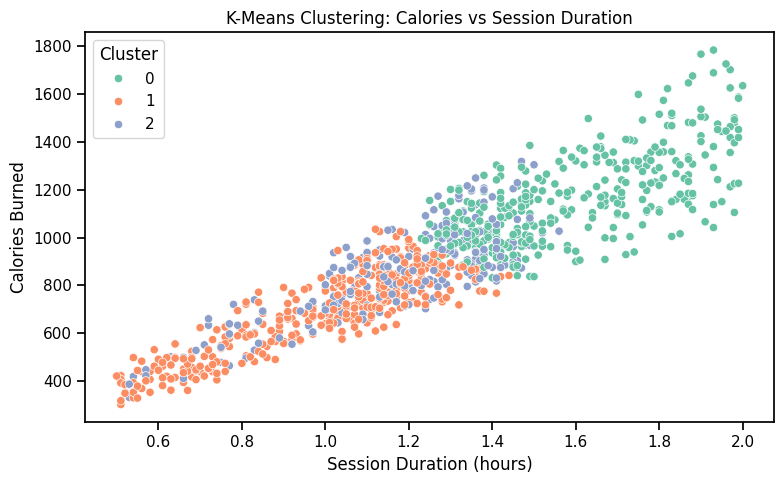

The predicted cluster for the new member is: Cluster 1


In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking (2).csv")

# Select numeric features
features = ['Calories_Burned', 'Session_Duration (hours)', 'BMI']
df_cluster = df[features].dropna()

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df_cluster['Session_Duration (hours)'],
    y=df_cluster['Calories_Burned'],
    hue=df_cluster['Cluster'],
    palette='Set2'
)
plt.title("K-Means Clustering: Calories vs Session Duration")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()

# New member data for prediction
new_member = pd.DataFrame([{
    'Calories_Burned': 300,
    'Session_Duration (hours)': 1.2,
    'BMI': 22.5
}])

new_scaled = scaler.transform(new_member)
predicted_cluster = kmeans.predict(new_scaled)[0]

print(f"The predicted cluster for the new member is: Cluster {predicted_cluster}")


CLUSTER PREDICTION AND GROUP AVERAGE

In [27]:
new_member_scaled = scaler.transform(new_member)

# Predict which cluster the new member belongs to
predicted_cluster = kmeans.predict(new_member_scaled)[0]

average_calories = df_cluster[df_cluster['Cluster'] == predicted_cluster]['Calories_Burned'].mean()

print(f"Predicted Cluster: {predicted_cluster}")
print(f"Estimated Average Calories Burned for this group: {average_calories:.2f}")


Predicted Cluster: 1
Estimated Average Calories Burned for this group: 693.97


HIERARCHICAL CLUSTERING

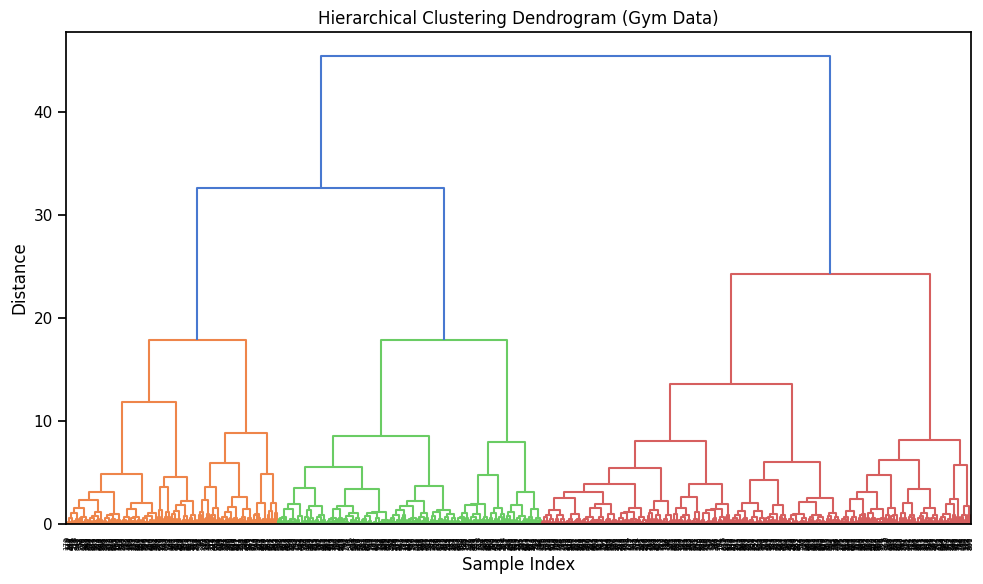

In [28]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False
)
plt.title('Hierarchical Clustering Dendrogram (Gym Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
